In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the dataset
dataset = pd.read_csv('beer_data.csv')
dataset.head()

,ABV,Ratings,Cellar Temperature,Score
0,6.5,22,40-45,3.28
1,5.5,1,35-40,3.52
2,8.1,3,35-40,4.01
3,NaN,0,35-40,0.00
4,6.0,1,35-40,2.73


In [3]:
#Dealing with missing values
dataset.isnull().sum()

ABV                   15130
Ratings                   0
Cellar Temperature     6781
Score                     0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185643 entries, 0 to 185642
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ABV                 170513 non-null  float64
 1   Ratings             185643 non-null  object 
 2   Cellar Temperature  178862 non-null  object 
 3   Score               185643 non-null  float64
dtypes: float64(2), object(2)
memory usage: 5.7+ MB


In [5]:
dataset['Ratings'] = dataset['Ratings'].apply(lambda x: np.float32(x.replace(",","")))

In [6]:
dataset['ABV'].fillna(dataset['ABV'].mean(),inplace=True)

In [7]:
dataset = dataset[~dataset['Cellar Temperature'].isna()]
dataset.reset_index(inplace = True, drop = True)

In [8]:
dataset.isnull().sum()

ABV                   0
Ratings               0
Cellar Temperature    0
Score                 0
dtype: int64

In [9]:
#Dealing with Categorical Values
dataset['Minimum Cellar Temperature'] = dataset['Cellar Temperature'].apply(lambda x : int(str(x).split('-')[0].strip()))
dataset['Maximum Cellar Temperature'] = dataset['Cellar Temperature'].apply(lambda x : int(str(x).split('-')[1].strip()))

In [10]:
dataset = dataset.drop(['Cellar Temperature'], axis = 1)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178862 entries, 0 to 178861
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ABV                         178862 non-null  float64
 1   Ratings                     178862 non-null  float64
 2   Score                       178862 non-null  float64
 3   Minimum Cellar Temperature  178862 non-null  int64  
 4   Maximum Cellar Temperature  178862 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 6.8 MB


In [12]:
x = dataset.drop(['Score'],axis =1)
y = dataset['Score']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [16]:
from sklearn.tree import DecisionTreeRegressor
#training and fitting the model
reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [17]:
#Predict the outcome of values
y_predict = reg.predict(x_test)
print("Predictions\n",y_predict)

Predictions
 [3.51822785 0.         3.41054965 ... 3.80353183 3.61686525 3.78941489]


In [18]:
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_predict,
                         "Abs. Error" : np.abs(y_test - y_predict)})

error_df

,Actual,Predicted,Abs. Error
171409,3.53,3.518228,0.011772
40042,0.00,0.000000,0.000000
31360,3.70,3.410550,0.289450
124591,3.91,4.003636,0.093636
42248,0.00,0.000000,0.000000
...,...,...,...
41154,3.00,3.481373,0.481373
150381,4.00,3.646846,0.353154
173523,3.98,3.803532,0.176468
49582,4.14,3.616865,0.523135


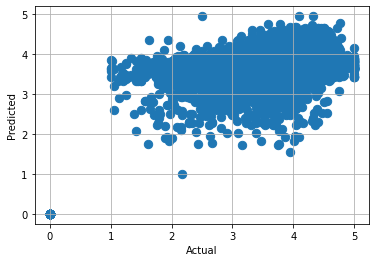

In [21]:
#Plotting Actual observation vs Predictions
plt.scatter(y_test, y_predict, s = 70)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.show()